In [77]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact #IntSlider, 
from scipy import interpolate
%matplotlib inline

In [79]:
nominal_torque_torque=13
tolerance_per_side=1
deviation_limit=0.2
test_samples=5
profile_standard_dev=0.2
nuts_per_profile=200
No_of_No_of_profiles=10
temperature_shift=0.3
trials=2000

In [80]:
def single_profile_nuts(nominal_torque,profile_standard_dev,deviation_limit,test_samples,nuts_per_profile):
    #generate (uniform distribution) number within limits: nominal +/-deviation_limit (it is X sample test average result)
    #then generate theroetical "real"  average torque for nuts from single profile (normal distribution)
    #then generate nuts_per_profile results
    test_average=np.random.uniform(nominal_torque-deviation_limit,nominal_torque+deviation_limit)
    profile_average=np.random.normal(test_average,profile_standard_dev/(test_samples)**0.5,)
    return np.random.normal(profile_average,profile_standard_dev,nuts_per_profile)

def ff(nominal_torque,
       profile_standard_dev,
       deviation_limit,
       test_samples,
       nuts_per_profile,
       No_of_profiles,
       trials,
       temperature_shift):
    
    failures=np.array([])
    batch_all_trials=np.array([])
    
    for j in range(trials):
        fail=0
        batch=np.array([])
        for i in range(No_of_profiles):
            a=0
            profile=single_profile_nuts(nominal_torque,profile_standard_dev,deviation_limit,test_samples,nuts_per_profile)
            batch=np.append(batch,profile)
        if (sum((np.random.choice(batch,12, replace=False )+temperature_shift)>(nominal_torque+tolerance_per_side)) > 0) |\
        (sum((np.random.choice(batch,12, replace=False )-temperature_shift)<(nominal_torque-tolerance_per_side)) > 0):
            fail=1
        failures=np.append(failures,fail)
        batch_all_trials=np.append(batch_all_trials,batch)
        
    plt.figure(figsize=(12,6));
    pass_ratio=np.round((trials-sum(failures))/trials,2)
    plt.hist(batch_all_trials+temperature_shift,bins=100)
    plt.hist(batch_all_trials-temperature_shift,bins=100)
    plt.hist(batch_all_trials,bins=100)
    plt.grid()
    plt.xlim(nominal_torque-2,nominal_torque+2)
    plt.ylim(0,trials*nuts_per_profile*No_of_profiles/20)
    plt.legend(['-10 deg C samples',
                '+50 deg C samples',
                'room temperature samples'])
    plt.title("total (green) STD= "+str(np.round(np.std(batch_all_trials),3))+\
              ', test pass ratio= '+str(np.round(pass_ratio*100,2))+'%')
    return 

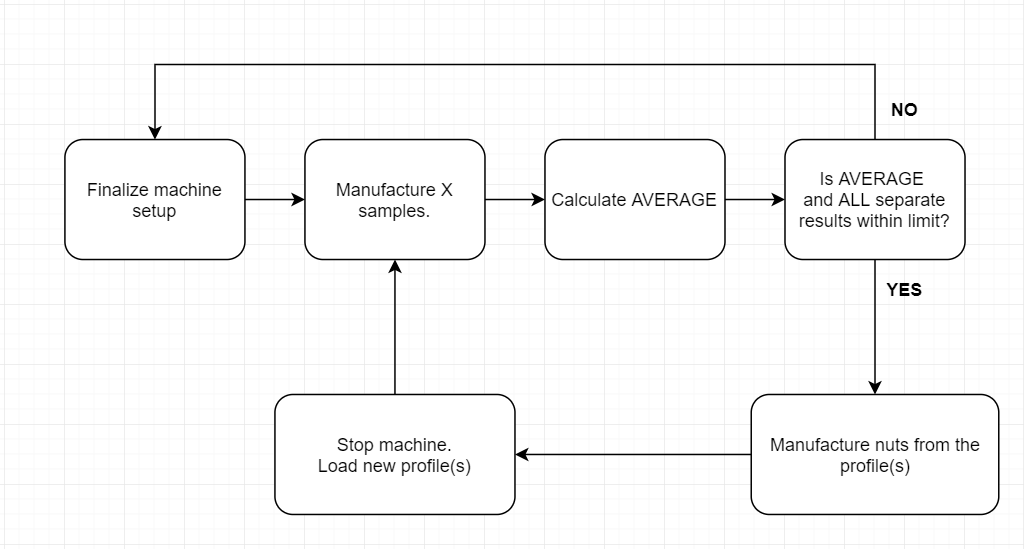

In [81]:
interact(ff,
         nominal_torque=range(13,15),
         profile_standard_dev=np.round(np.arange(0.2,0.70,0.05),2),
         deviation_limit=np.round(np.arange(0.2,0.6,0.1),2),
         test_samples=range(3,7,2),
         nuts_per_profile=range(100,300,50),
         No_of_profiles=range(5,25,5),
         temperature_shift=np.round(np.arange(0.2,0.5,0.1),2),
         trials=range(1000,6000,2000));

interactive(children=(Dropdown(description='nominal_torque', options=(13, 14), value=13), Dropdown(description…

In [82]:
!!jupyter nbconvert SLIW76_nut_simulation_python-interact.ipynb

['[NbConvertApp] Converting notebook SLIW76_nut_simulation_python-interact.ipynb to html',
 '[NbConvertApp] Writing 379716 bytes to SLIW76_nut_simulation_python-interact.html']